In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#estimators
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

#model metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

#cross validation
from sklearn.model_selection import train_test_split

In [2]:
#Reading data file
rawData = pd.read_csv('C:\\Users\\priscilla.mora\\Desktop\\Big Data XTOL\\5) Data Science with Python\\3) Build and Evaluate Models\\default_credit_card_clients_fixed.csv')

In [3]:
#Remove the ID column
rawData.drop(rawData.columns[0], axis='columns', inplace=True)

In [4]:
#Remove outliers
rawData = rawData.drop(rawData[rawData.LIMIT_BAL >= 500000].index) #It used to be 1,000,000

In [5]:
#Create new columns for age range
bins = [20, 30, 40, 50, 60, 70, 80]  
labels = ['20', '30', '40', '50', '60', '70']
#labels = ['20-29', '30-39', '40-49', '50-59', '60-69', '70+']
rawData['agerange'] = pd.cut(rawData.AGE, bins, labels = labels,include_lowest = True)

In [6]:
#Setting variables to categorical
rawData['GENDER'] = rawData['GENDER'].astype('category')
rawData['EDUCATION'] = rawData['EDUCATION'].astype('category')
rawData['MARRIAGE'] = rawData['MARRIAGE'].astype('category')
rawData['default payment next month'] = rawData['default payment next month'].astype('category')

In [7]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29072 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   LIMIT_BAL                   29072 non-null  int64   
 1   GENDER                      29072 non-null  category
 2   EDUCATION                   29072 non-null  category
 3   MARRIAGE                    29072 non-null  category
 4   AGE                         29072 non-null  int64   
 5   PAY_0                       29072 non-null  int64   
 6   PAY_2                       29072 non-null  int64   
 7   PAY_3                       29072 non-null  int64   
 8   PAY_4                       29072 non-null  int64   
 9   PAY_5                       29072 non-null  int64   
 10  PAY_6                       29072 non-null  int64   
 11  BILL_AMT1                   29072 non-null  int64   
 12  BILL_AMT2                   29072 non-null  int64   
 13  BILL_AMT3       

In [8]:
#Grouping delay payments into one category
rawData['PAY_0'].replace({1: 9, 2: 9, 3: 9, 4: 9, 5: 9, 6: 9, 7: 9, 8: 9, 9: 9}, inplace=True)
rawData['PAY_2'].replace({1: 9, 2: 9, 3: 9, 4: 9, 5: 9, 6: 9, 7: 9, 8: 9, 9: 9}, inplace=True)
rawData['PAY_3'].replace({1: 9, 2: 9, 3: 9, 4: 9, 5: 9, 6: 9, 7: 9, 8: 9, 9: 9}, inplace=True)
rawData['PAY_4'].replace({1: 9, 2: 9, 3: 9, 4: 9, 5: 9, 6: 9, 7: 9, 8: 9, 9: 9}, inplace=True)
rawData['PAY_5'].replace({1: 9, 2: 9, 3: 9, 4: 9, 5: 9, 6: 9, 7: 9, 8: 9, 9: 9}, inplace=True)
rawData['PAY_6'].replace({1: 9, 2: 9, 3: 9, 4: 9, 5: 9, 6: 9, 7: 9, 8: 9, 9: 9}, inplace=True)

In [9]:
#Grouping others education category into one
rawData['EDUCATION'].replace({0: 0, 4: 0, 5: 0, 6: 0}, inplace=True)

In [10]:
#features
features = rawData[['EDUCATION', 'GENDER', 'agerange', 'MARRIAGE', 'LIMIT_BAL', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]
print(features.head())

   EDUCATION GENDER agerange MARRIAGE  LIMIT_BAL  PAY_0  PAY_2  PAY_3  PAY_4  \
0          2      2       20        1      20000      9      9     -1     -1   
1          2      2       20        2     120000     -1      9      0      0   
2          2      2       30        2      90000      0      0      0      0   
3          2      2       30        1      50000      0      0      0      0   
4          2      1       50        1      50000     -1      0     -1      0   

   PAY_5  PAY_6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  
0     -2     -2         0       689         0         0         0         0  
1      0      9         0      1000      1000      1000         0      2000  
2      0      0      1518      1500      1000      1000      1000      5000  
3      0      0      2000      2019      1200      1100      1069      1000  
4      0      0      2000     36681     10000      9000       689       679  


In [11]:
#dependent variable
depVar = rawData['default payment next month']

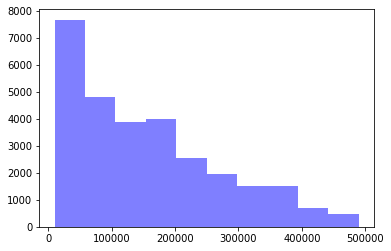

In [12]:
#Credit Value Histogram
plt.hist(rawData['LIMIT_BAL'], 10, facecolor='blue', alpha=0.5)
plt.show()

In [13]:
X_train, X_test, y_train, y_test = train_test_split(features, depVar, train_size=0.8, random_state=0)
print(X_train.shape) 

(23257, 17)


In [14]:
print(X_test.shape)

(5815, 17)


In [15]:
#Models
modelSVR = SVC(kernel='sigmoid',gamma = 'auto', random_state=0)
modelRF = RandomForestClassifier(n_estimators=250, random_state=0, max_features=2)
modelLR = LogisticRegression(solver='liblinear', random_state=0)

In [16]:
#Support Vector Classifier
modelSVR.fit(X_train,y_train)
print("===== Cross Validation Score ======")
print(cross_val_score(modelSVR, X_train, y_train))

print("===== Score ======")
print(modelSVR.score(X_train,y_train))

===== Cross Validation Score ======
[0.77386071 0.77386071 0.77402709 0.77381208 0.77381208]
===== Score ======
0.7738745323988476


In [17]:
predictionsSVR = modelSVR.predict(X_test)

print("===== Accuracy ======")
print(accuracy_score(y_test, predictionsSVR))

cm = confusion_matrix(y_test, predictionsSVR) 
print ("===== Confusion Matrix =====\n", cm)

===== Accuracy ======
0.7810834049871023
===== Confusion Matrix =====
 [[4542    0]
 [1273    0]]


In [18]:
objects = ('Yes', 'No')
y_pos = np.arange(len(objects))

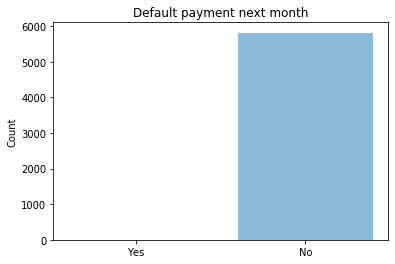

In [19]:
values = [(predictionsSVR ==1).sum(), (predictionsSVR ==0).sum()]
plt.bar(y_pos, values, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Count')
plt.title('Default payment next month')
plt.show()

In [20]:
#Random Forest
modelRF.fit(X_train,y_train)
print("===== Cross Validation Score ======")
print(cross_val_score(modelRF, X_train, y_train))

print("===== Score ======")
print(modelRF.score(X_train,y_train))

===== Cross Validation Score ======
[0.80395529 0.81255374 0.80971834 0.79767792 0.80219308]
===== Score ======
0.9962591907812701


In [21]:
predictionsRF = modelRF.predict(X_test)

print("===== Accuracy ======")
print(accuracy_score(y_test, predictionsRF))

cmRF = confusion_matrix(y_test, predictionsRF) 
print ("===== Confusion Matrix =====\n", cmRF)

===== Accuracy ======
0.8067067927773001
===== Confusion Matrix =====
 [[4243  299]
 [ 825  448]]


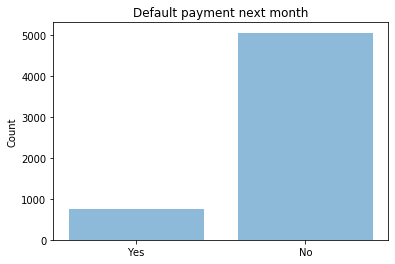

In [22]:
valuesRF = [(predictionsRF ==1).sum(), (predictionsRF ==0).sum()]
plt.bar(y_pos, valuesRF, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Count')
plt.title('Default payment next month')
plt.show()

In [23]:
#Logistic Regression
modelLR.fit(X_train,y_train)
print(cross_val_score(modelLR, X_train, y_train))

print(modelLR.score(X_train,y_train))

[0.7766552  0.79858126 0.7742421  0.78993765 0.78133735]
0.801006148686417


In [24]:
predictionsLR = modelLR.predict(X_test)
print("===== Accuracy ======")
print(accuracy_score(y_test, predictionsLR))

cmLR = confusion_matrix(y_test, predictionsLR) 
print ("===== Confusion Matrix =====\n", cmLR)


===== Accuracy ======
0.8010318142734307
===== Confusion Matrix =====
 [[4311  231]
 [ 926  347]]


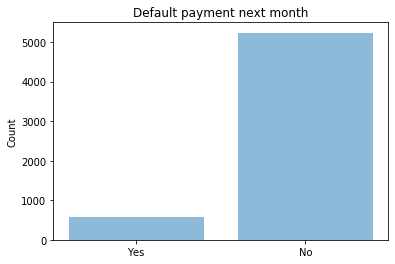

In [25]:
valuesLR = [(predictionsLR ==1).sum(), (predictionsLR ==0).sum()]
plt.bar(y_pos, valuesLR, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Count')
plt.title('Default payment next month')
plt.show()